<a href="https://colab.research.google.com/github/sarthak-314/100-Days-in-Data/blob/master/6.%20Model%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODEL SELECTION**
Why build model? - resons to build this shit


In [ ]:
#Config
import pandas as pd
import os
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
#Loading the dataframes
DF_PATH = './100D Data/Model Data/'
X = pd.read_csv(os.path.join(DF_PATH, 'X'), index_col=0)
Y = pd.read_csv(os.path.join(DF_PATH, 'Y'), index_col=0)
X.head()

,deep_sleep,wakeup_at_hr,is_weekstart,is_weekmid,is_weekend
date,,,,,
24th August,48,12.383,1.0,0.0,0.0
25th August,77,5.800,0.0,1.0,0.0
26th August,48,12.883,0.0,1.0,0.0
27th August,10,1.633,0.0,0.0,1.0
28th August,112,6.600,0.0,0.0,1.0


Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Sleep, days_after_break (week_start, week_mid, week_end) for 3 3 3, prev coding time and shit, previous day or time series data

In [ ]:
#Cost function - l2 - ordinary least square

#**FINAL MODEL**
***

some shit bout the moodel

***

###Model 1 - **Baseline** Model
A model that always returns the average value .

Even a model that always returns the average value for every query works well for my purposes. If I aim to beat my average time everyday, I'm still improving.


In [ ]:
def base_model(): 
    WORKING_DAYS = df_code.date.nunique()
    return df_code['duration(hr)'].sum() / WORKING_DAYS

print('Baseline model prediction for every query :', round(base_model(), 2), 'hours')

NameError: ignored

###Model 2 - Simple *Linear Regression*

In the Feature Selection notebook, I found out that deep_sleep has high correlation with total_code_time, hence I will take that as a linear regression input

This model will output the predicted total_code_time for the day on basis of deep_sleep that night

In [ ]:
X

Linear

In [ ]:
from sklearn.linear_model import LinearRegression
df = df_code.groupby(['date'])['duration(hr)'].sum().reset_index()
df = df.merge(df_smartwatch[['deep_sleep', 'date']], on='date')
X = df.drop(['date', 'duration(hr)'], axis=1)
Y = df['duration(hr)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
round(linreg.score(X_train, Y_train) * 100, 2)

plt.subplots(figsize=(10, 8))
g = sns.scatterplot(x='deep_sleep', y='duration(hr)',data=df)
_ = sns.lineplot(x=df['deep_sleep'], y=linreg.predict(df['deep_sleep'].to_frame()))
g.set_xlabel('Total deep sleep (minutes)')
_ = g.set_ylabel('Total coding time (hours)')

The predicted line has a high positive slope which means that sleep has a good impact on my productivity and adding that information should make the model perform a lot better 

In [ ]:
|from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

###Model 3 - K Nearest Neighbours


In [ ]:
#Deep sleep, weekday and shit, 
df = df_code.groupby(['date'])['duration(hr)'].sum().reset_index()
df = df.merge(df_smartwatch[['deep_sleep', 'date']], on='date')
df = df.merge(df_date[['days_after_break', 'date']], on='date')
def get_weekday(days):
    if days <= 3: return 'weekstart'
    if 3 <days <= 6: return 'weekmid'
    return 'weekend'
df['weekday'] = df.days_after_break.apply(get_weekday)
df

In [ ]:
X = df[['deep_sleep', 'days_after_break']]
Y = df[['duration(hr)']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
grouped = df_code.groupby(['date', 'part_of_day'])['duration(hr)'].sum().reset_index()
grouped = grouped.merge(df_date[['date', 'days_after_break']], on='date')

,part_of_day,days_after_break
0,early morning,1
1,evening,1
2,late morning,1
3,early morning,2
4,evening,2
5,late morning,2
6,early morning,3
7,evening,3
8,late morning,3
9,early morning,4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

Y = grouped['duration(hr)']

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X = grouped.drop(['date', 'duration(hr)'], axis=1)
Y = grouped['duration(hr)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

ValueError: ignored

To keep it simple I will make a model that predicts total time spent coding on basis of some selected features.

What do I know about the day. Wake up time, time spent sleeping, day of the week, prev code time and efficiency. So baby, thats the model - it predicts total code time

In [ ]:
df_smartwatch.head()

,date,sleep,deep_sleep,sleep_start,wakeup_time,sleep_duration(hr),steps_walked,km_walked,avg_heart_rate,stress,calories,week
0,24th August,5:55 PM - 12:23 AM,48,5:55 PM,12:23 AM,6.47,17430,14.62,55,38,3607,1
1,25th August,9:59 PM - 5:48 AM,77,9:59 PM,5:48 AM,7.82,7339,5.94,51,22,2670,1
2,26th August,7:53 PM - 12:53 AM,48,7:53 PM,12:53 AM,5.00,4195,3.55,51,33,2634,1
3,27th August,8:38 PM - 1:38 AM,10,8:38 PM,1:38 AM,5.00,6110,4.93,50,17,2697,1
4,28th August,8:55 PM - 6:36 AM,112,8:55 PM,6:36 AM,9.68,7532,6.08,53,29,2869,1


In [ ]:
df_date.head()

,date,day_number,is_halfday,days_after_break,week
0,24th August,1.0,False,1,1
1,25th August,2.0,False,2,1
2,26th August,3.0,False,3,1
3,27th August,4.0,False,4,1
4,28th August,5.0,True,5,1


In [ ]:
x = df_code.groupby(['date'])['duration(hr)'].sum().reset_index()
x = x.merge(df_smartwatch[['sleep_duration(hr)', 'date']], on='date')
x.head()

,date,duration(hr),sleep_duration(hr)
0,24th August,9.25,6.47
1,25th August,5.50,7.82
2,26th August,9.00,5.00
3,27th August,6.75,5.00
4,28th August,3.00,9.68


In [ ]:
#TODO - pd.set_option('percision', 3) before df.describe()


In [ ]:
#TODO - code to get the largest correlations
x = df_code.groupby('date')['duration(hr)'].sum().reset_index()
x = x.merge(df_smartwatch, on='date')
correlation = x.corr()
columns = correlation.nlargest(10, 'duration(hr)').index
columns

Index(['duration(hr)', 'stress', 'calories', 'km_walked', 'steps_walked',
       'avg_heart_rate', 'deep_sleep', 'sleep_duration(hr)'],
      dtype='object')

In [ ]:
# X, Y = x.drop(['duration(hr)', 'date']), x['duration()']

##Baseline algorithm test
There are a few regression algorithms I can use. I prefer to line the usable regression algorithms up and run them using a standard set of data. I check the negative mean square error of each run.The given data set is broken down into training set and testing set. The test set is 20% of the provided data set.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

The differing scales of the raw data may impact these algorithms. Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. I implement standardisation using pipelines. I then use cross-validation to validate performance of algorithms in totality.

In [ ]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import xgboost as xgb
import lightgbm as lgb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=1))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('XGB Regressor', Pipeline([('XGB', xgb.XGBRegressor())])))
pipelines.append(('LGBM Regressor', Pipeline([('LGBM', lgb.LGBMRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=2, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TypeError: ignored

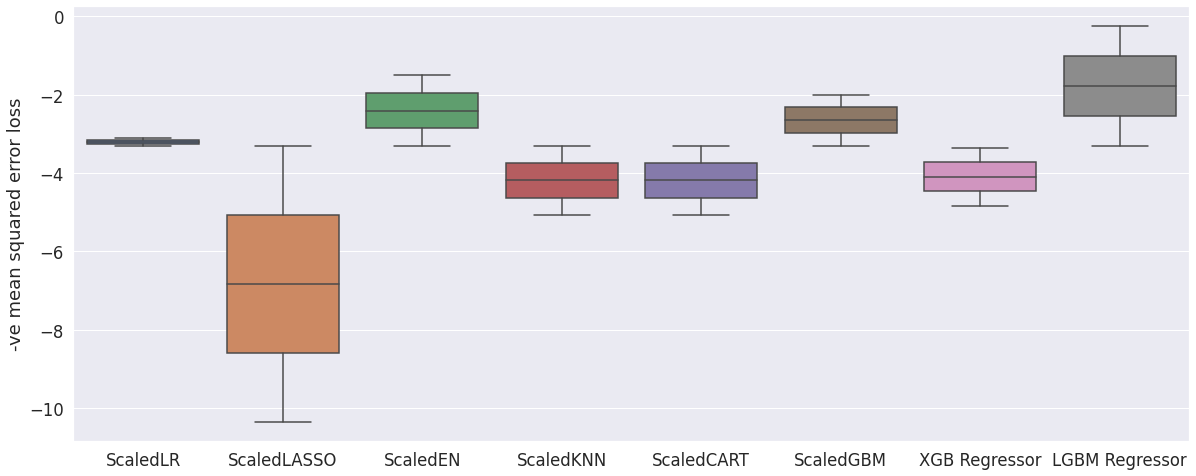

In [ ]:
#Comparing results of diffrent algos
plt.figure(figsize=(20, 8))
g = sns.boxplot(x=names, y=results)
_ = g.set_ylabel('-ve mean squared error loss')


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
